## Observations and Insights

## Dependencies and starter code

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_data = combined_data_df.groupby(['Drug Regimen']).mean()
tum_mean = (grouped_data['Tumor Volume (mm3)'])
tum_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [40]:
tum_median = combined_data_df.groupby(['Drug Regimen']).median()
tum_median1 = (tum_median['Tumor Volume (mm3)'])
tum_median1

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [41]:
tum_vars = combined_data_df.groupby(['Drug Regimen']).var()
tum_vars1 = (tum_vars['Tumor Volume (mm3)'])
tum_vars1

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [42]:
tum_stdev = combined_data_df.groupby(['Drug Regimen']).std()
tum_stdev1 = (tum_stdev['Tumor Volume (mm3)'])
tum_stdev1

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [36]:
tum_stderr = combined_data_df.groupby(['Drug Regimen']).sem()
tum_stderr1 = (tum_stderr['Tumor Volume (mm3)'])
tum_stderr1

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [43]:
cols =['Mean Tumor Volume', 'Media Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev',
      'Tumor Volume Std. Err']
disc1 = {cols[0] :tum_mean, cols[1] : tum_median1, cols[2] : tum_vars1, cols[3] : tum_stdev1,
        cols[4]: tum_stderr1}
summary_table_df = (pd.DataFrame(data = disc1))


In [44]:
summary_table_df

,Mean Tumor Volume,Media Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
drug_sum = combined_data_df.groupby(['Drug Regimen']).count()
drug_sum1 = (drug_sum['Tumor Volume (mm3)'])
cols_bar = ['Number of Data Points']
disc2 = {cols_bar[0] : drug_sum1}
summary_table2_df = (pd.DataFrame(data = disc2))

In [46]:
summary_table2_df

,Number of Data Points
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


## Bar plots

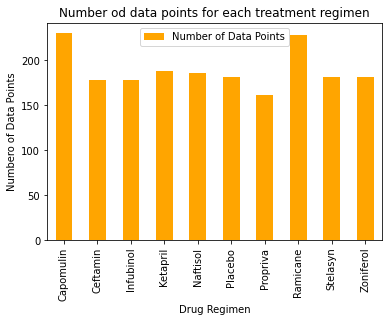

In [47]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar1 = summary_table2_df.plot(kind = "bar",color = "orange", title= "Number od data points for each treatment regimen")

bar1.set_ylabel("Numbero of Data Points")
plt.show()


Text(0.5, 1.0, 'Number of data point for each treatment regimen')

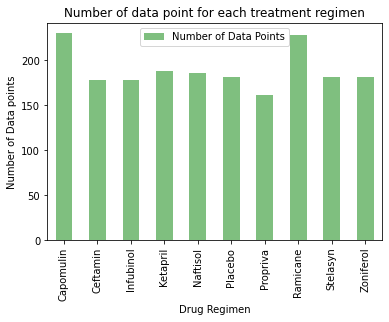

In [48]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar1 = summary_table2_df.plot(kind="bar", color = "green", alpha= 0.5)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data points")
plt.title("Number of data point for each treatment regimen")


## Pie plots

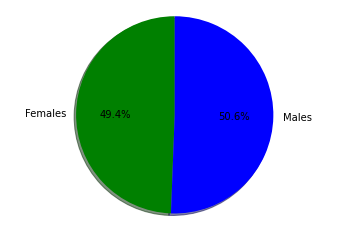

In [49]:
# Count numbers of each gender
sex_num = combined_data_df.groupby(['Sex']).count()
sex_num1 = (sex_num['Mouse ID'])

cols_gen =['Gender']
disc3 = {cols_gen[0] : sex_num1}
summary_table3_df = (pd.DataFrame(data = disc3))
summary_table3_df

#Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ["green", "blue"]
labels2 = ["Females", "Males"]
plt.pie(sex_num1,explode= (0,0), labels= labels2, colors=colors, autopct="%1.1f%%", shadow= True,
       startangle=90)
plt.axis("equal")
plt.show()

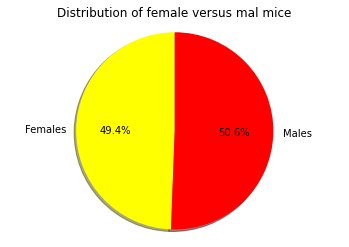

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["yellow", "red"]
labels2 = ["Females", "Males"]
plt.pie(sex_num1,explode= (0,0), labels= labels2, colors=colors, autopct="%1.1f%%", shadow= True,
       startangle=90)
plt.title("Distribution of female versus mal mice")
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
Final_vol_Each=combined_data_df[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]].groupby("Mouse ID").max()

#Final vol for Regimens with lowest SEM would be the most promising treatment 
Final_vol_4_regimens = Final_vol_Each.loc[(Final_vol_Each["Drug Regimen"]=="Capomulin")
                                 |(Final_vol_Each["Drug Regimen"]=="Infubinol")
                                 |(Final_vol_Each["Drug Regimen"]=="Ramicane")
                                 |(Final_vol_Each["Drug Regimen"]=="Ceftamin"),:] 


# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = Final_vol_4_regimens[["Tumor Volume (mm3)"]].quantile([.25,.5,.75])

lowerq = quartiles.iloc[0,0]
upperq = quartiles.iloc[2,0]
iqr = upperq-lowerq

print(f'lower quartile is {lowerq}')
print(f'upper quartile is {upperq}')
print(f'iqr is {iqr}')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


lower quartile is 45.5098442875
upper quartile is 59.930261755000004
iqr is 14.420417467500002
Values below 23.87921808625 could be outliers.
Values above 81.56088795625001 could be outliers.


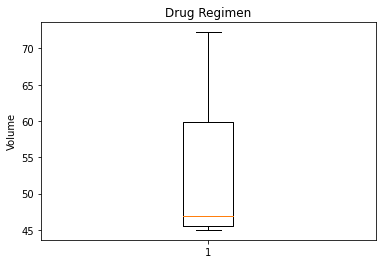

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Final_vol_boxplot = Final_vol_4_regimens[["Tumor Volume (mm3)"]].values

fig, ax = plt.subplots()
ax.set_title('Drug Regimen')
ax.set_ylabel('Volume')
ax.boxplot(Final_vol_boxplot)
plt.show()

## Line and scatter plots

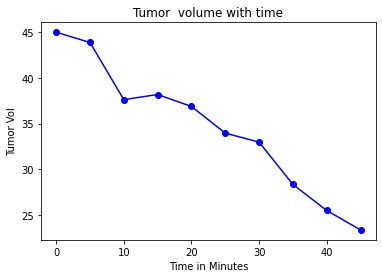

In [53]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
combined_results = pd.merge(mouse_metadata,study_results, how="outer", on ="Mouse ID")

capomulin_treatment =combined_results.loc[(combined_results["Drug Regimen"]=="Capomulin")
                                          &(combined_results["Mouse ID"]=="s185")
                                          ,["Mouse ID","Timepoint","Tumor Volume (mm3)"]]

time_point =capomulin_treatment["Timepoint"]
Tumor_vol =capomulin_treatment["Tumor Volume (mm3)"]
#print(capomulin_treatment)

x_axis = time_point
y_axis = Tumor_vol

plt.plot(x_axis, y_axis, marker ='o', color='blue', label="tumor volume")
plt.title("Tumor  volume with time")
plt.ylabel("Tumor Vol")
plt.xlabel("Time in Minutes")
plt.show()

Text(0.5, 0, 'Avg Weight')

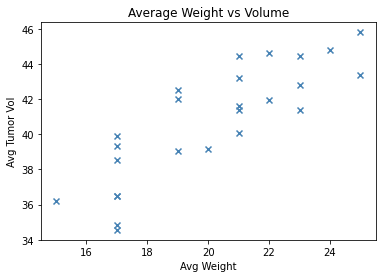

In [54]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_tumor_vol =combined_results.loc[(combined_results["Drug Regimen"]=="Capomulin")
                                          ,["Mouse ID","Tumor Volume (mm3)"]]
avg_tumor_vol =Capomulin_tumor_vol.groupby("Mouse ID").mean().values


Capomulin_mouse_weight =combined_results.loc[(combined_results["Drug Regimen"]=="Capomulin")
                                          ,["Mouse ID","Weight (g)"]]
avg_mouse_weight =Capomulin_mouse_weight.groupby("Mouse ID").mean().values

plt.scatter(avg_mouse_weight, avg_tumor_vol, marker="x", facecolors="steelblue", edgecolors="black")
plt.title("Average Weight vs Volume")
plt.ylabel("Avg Tumor Vol")
plt.xlabel("Avg Weight")


In [24]:
######## Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
